In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
weights = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"]
class_num = ["23", "34"]
evaluation_method = ["purity", "nmi", "ari"]


In [4]:
for c_num in class_num:
    for em in evaluation_method:
        uni = list()
        add = list()
        cat = list()
        for file in glob.glob('./csv_' + c_num + '/' + em + '/*'):
            if "add" in file:
                add.append(file)
            elif "cat" in file:
                cat.append(file)
            else:
                uni.append(file)

        uni.sort()
        add.sort()
        cat.sort()

        labels = list()
        labels_x = list()
        labels_a = list()
        km_add = list()
        km_cat = list()
        gmm_add = list()
        gmm_cat = list()
        for csvFile in uni:
            if 're' in csvFile:
                labels.append("Real")
                labels_x.append('Real')
                labels_a.append('Real')
            elif 'seq2seq' in csvFile:
                labels.append("seq2seq")
                labels_x.append('seq2seq')
                labels_a.append('seq2seq')
            elif 'se' in csvFile:
                labels.append("Semantic")
                labels_x.append('Semantic')
                labels_a.append('Semantic')
            elif 'rico' in csvFile:
                labels.append("Rico")
                labels_x.append('Rico')
                labels_a.append('Rico')
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_add.append(float(res.split(',')[-1]))
                km_cat.append(float(res.split(',')[-1]))
                gmm_add.append(float(res.split(',')[0]))
                gmm_cat.append(float(res.split(',')[0]))


        for csvFile in add:
            if 'rico' in csvFile:
                if 'seq2seq' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & seq2seq " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & seq2seq " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & Real " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("Rico & Semantic " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("Rico & Semantic " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
            elif 'seq2seq' in csvFile:
                if 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("seq2seq & Real " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("seq2seq & Real " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            labels_a.append("seq2seq & Semantic " + w)
                            labels_x.append(w)
                            if w == "0.1":
                                labels.append("seq2seq & Semantic " + w)
                                is_w = True
                                break
                            else:
                                labels.append(w)
                                is_w = True
                                break
                    if not is_w:
                        continue
            else:
                is_w = False
                for w in weights:
                    if w in csvFile:
                        labels_a.append("Real & Semantic " + w)
                        labels_x.append(w)
                        if w == "0.1":
                            labels.append("Real & Semantic " + w)
                            is_w = True
                            break
                        else:
                            labels.append(w)
                            is_w = True
                            break
                if not is_w:
                    continue
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_add.append(float(res.split(',')[-1]))
                gmm_add.append(float(res.split(',')[0]))

        for csvFile in cat:
            if 'rico' in csvFile:
                if 'seq2seq' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            elif 'seq2seq' in csvFile:
                if 're' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
                elif 'se' in csvFile:
                    is_w = False
                    for w in weights:
                        if w in csvFile:
                            is_w = True
                            break
                    if not is_w:
                        continue
            else:
                is_w = False
                for w in weights:
                    if w in csvFile:
                        is_w = True
                        break
                if not is_w:
                    continue
            with open(csvFile, 'r') as f:
                res = f.readline()
                km_cat.append(float(res.split(',')[-1]))
                gmm_cat.append(float(res.split(',')[0]))
                
        #make_df(km_add, km_cat, gmm_add, gmm_cat, c_num, em)
        #plot(labels, km_add, km_cat, gmm_add, gmm_cat, em)
        df = pd.DataFrame(data=list(zip(km_add, km_cat, gmm_add, gmm_cat)), columns=['K-Means (Add)', 'K-Means (Cat)', 'GMM (Add)', 'GMM (Cat)'])
        if c_num == '23':
            if em == 'ari':
                df_ari_23 = df.copy(deep=True)
            elif em == 'nmi':
                df_nmi_23 = df.copy(deep=True)
            elif em == 'purity':
                df_purity_23 = df.copy(deep=True)
        elif c_num == '34':
            if em == 'ari':
                df_ari_34 = df.copy(deep=True)
            elif em == 'nmi':
                df_nmi_34 = df.copy(deep=True)
            elif em == 'purity':
                df_purity_34 = df.copy(deep=True)

In [5]:
df_ari_23.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
0,0.175,0.175,0.167,0.167
1,0.325,0.325,0.324,0.324
2,0.199,0.199,0.212,0.212
3,0.290,0.290,0.278,0.278
4,0.336,0.337,0.336,0.331


In [6]:
for k, i in enumerate(zip(df_ari_23.idxmax(), df_ari_23.max())):
    print(k, i[0], i[1])

0 37 0.337
1 36 0.343
2 4 0.336
3 37 0.349


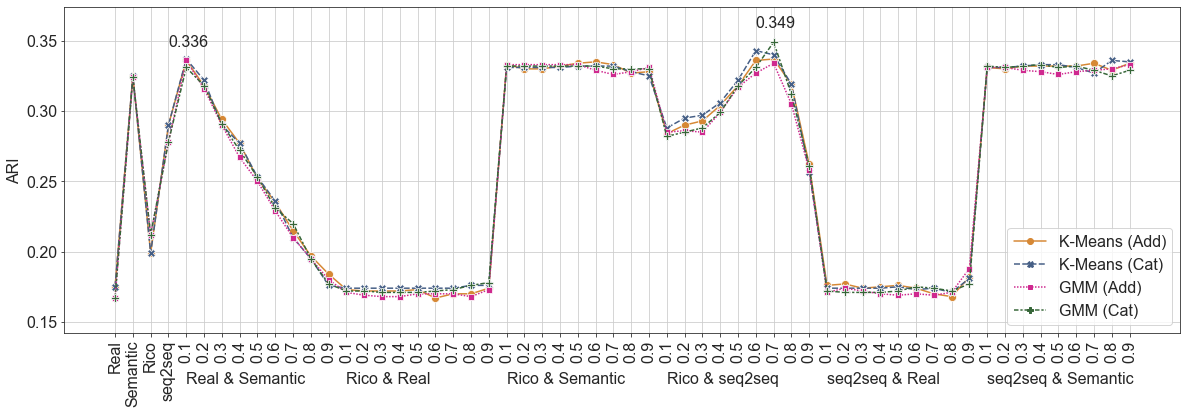

In [7]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_ari_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('ARI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_ari_23.min().min()-0.025, df_ari_23.max().max()+0.025])
plt.text(4, 0.106, 'Real & Semantic')
plt.text(13, 0.106, 'Rico & Real')
plt.text(22, 0.106, 'Rico & Semantic')
plt.text(31, 0.106, 'Rico & seq2seq')
plt.text(40, 0.106, 'seq2seq & Real')
plt.text(49, 0.106, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_ari_23.idxmax(), df_ari_23.max())):
    if i==2 or i==3:
        plt.text(j[0]-1, j[1]+0.01, str(j[1]))
plt.savefig('../result/plot_ari_23.png', format='png', bbox_inches='tight', transparent=True)

In [8]:
for k, i in enumerate(zip(df_nmi_23.idxmax(), df_nmi_23.max())):
    print(k, i[0], i[1])

0 57 0.604
1 4 0.604
2 57 0.6
3 4 0.599


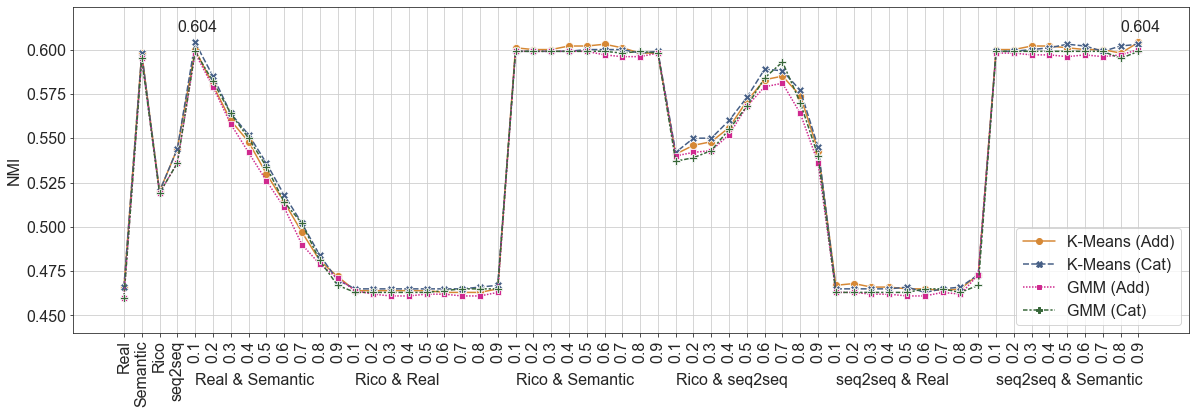

In [9]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_nmi_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('NMI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_nmi_23.min().min()-0.02, df_nmi_23.max().max()+0.02])
plt.text(4, 0.411, 'Real & Semantic')
plt.text(13, 0.411, 'Rico & Real')
plt.text(22, 0.411, 'Rico & Semantic')
plt.text(31, 0.411, 'Rico & seq2seq')
plt.text(40, 0.411, 'seq2seq & Real')
plt.text(49, 0.411, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_nmi_23.idxmax(), df_nmi_23.max())):
    if i==0 or i==1:
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
plt.savefig('../result/plot_nmi_23.png', format='png', bbox_inches='tight', transparent=True)

In [10]:
for k, i in enumerate(zip(df_purity_23.idxmax(), df_purity_23.max())):
    print(k, i[0], i[1])

0 55 0.429
1 36 0.434
2 49 0.43
3 26 0.427


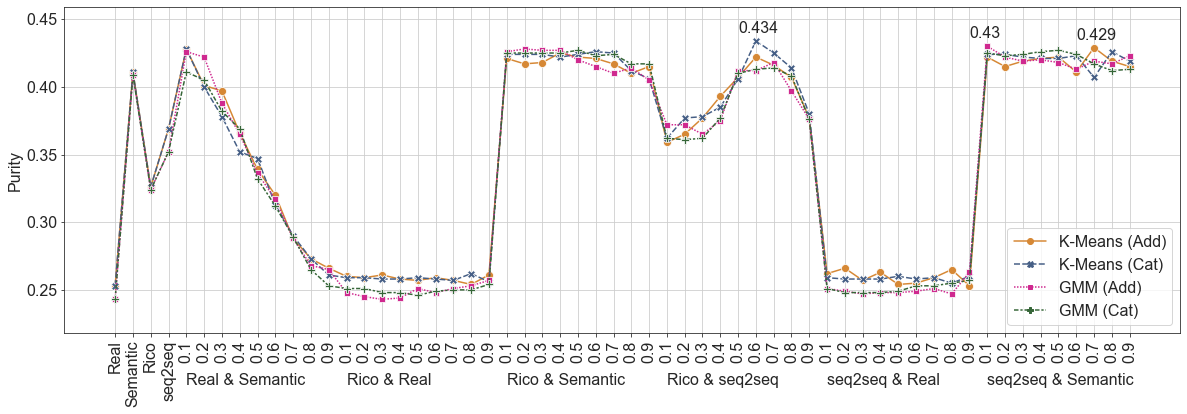

In [11]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_purity_23.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('Purity')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_purity_23.min().min()-0.025, df_purity_23.max().max()+0.025])
plt.text(4, 0.18, 'Real & Semantic')
plt.text(13, 0.18, 'Rico & Real')
plt.text(22, 0.18, 'Rico & Semantic')
plt.text(31, 0.18, 'Rico & seq2seq')
plt.text(40, 0.18, 'seq2seq & Real')
plt.text(49, 0.18, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_purity_23.idxmax(), df_purity_23.max())):
    if i != 3: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
plt.savefig('../result/plot_purity_23.png', format='png', bbox_inches='tight', transparent=True)

In [12]:
for k, i in enumerate(zip(df_ari_34.idxmax(), df_ari_34.max())):
    print(k, i[0], i[1])

0 37 0.373
1 37 0.383
2 37 0.361
3 37 0.375


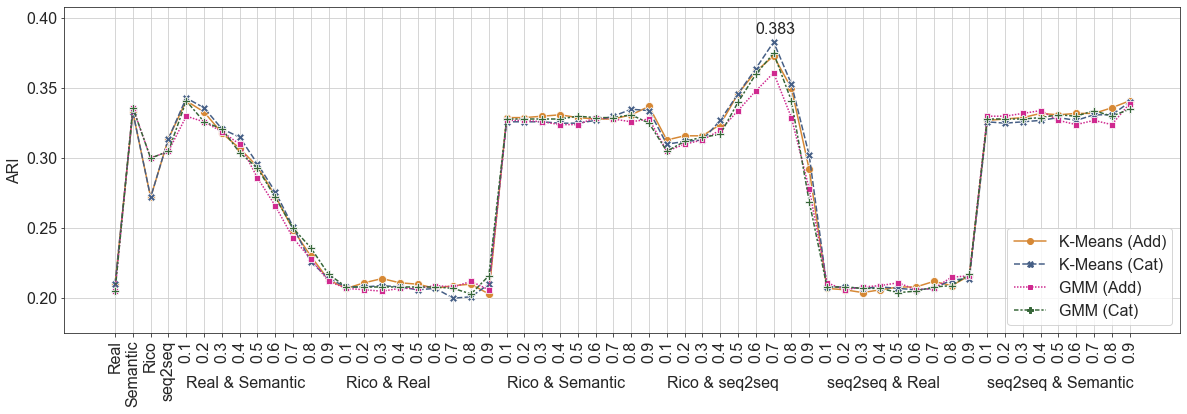

In [13]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_ari_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34, palette=colors, markers=True, markersize=8)
plt.legend(loc="lower right")
plt.ylabel('ARI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_ari_34.min().min()-0.025, df_ari_34.max().max()+0.025])
plt.text(4, 0.136, 'Real & Semantic')
plt.text(13, 0.136, 'Rico & Real')
plt.text(22, 0.136, 'Rico & Semantic')
plt.text(31, 0.136, 'Rico & seq2seq')
plt.text(40, 0.136, 'seq2seq & Real')
plt.text(49, 0.136, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_ari_34.idxmax(), df_ari_34.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
plt.savefig('../result/plot_ari_34.png', format='png', bbox_inches='tight', transparent=True)

In [14]:
for k, i in enumerate(zip(df_nmi_34.idxmax(), df_nmi_34.max())):
    print(k, i[0], i[1])

0 57 0.63
1 4 0.631
2 57 0.627
3 1 0.626


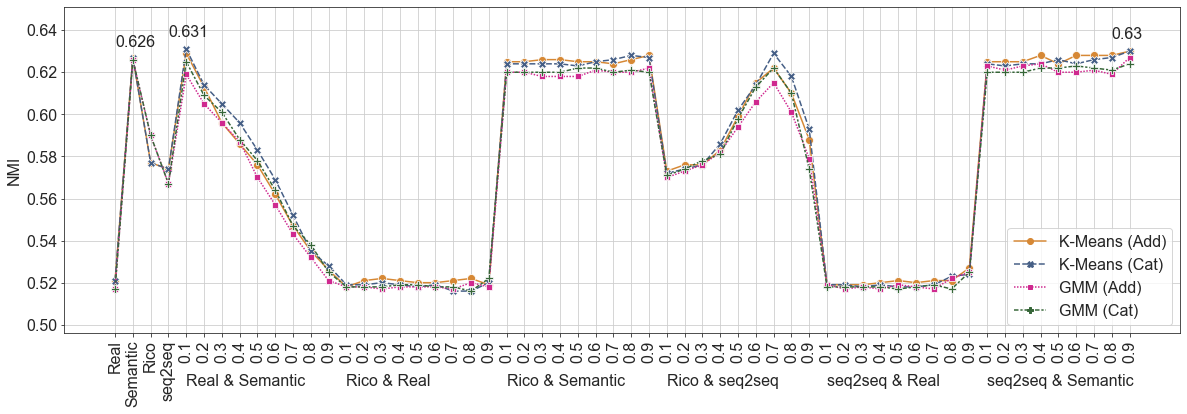

In [15]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_nmi_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('NMI')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_nmi_34.min().min()-0.02, df_nmi_34.max().max()+0.02])
plt.text(4, 0.471, 'Real & Semantic')
plt.text(13, 0.471, 'Rico & Real')
plt.text(22, 0.471, 'Rico & Semantic')
plt.text(31, 0.471, 'Rico & seq2seq')
plt.text(40, 0.471, 'seq2seq & Real')
plt.text(49, 0.471, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_nmi_34.idxmax(), df_nmi_34.max())):
    if i != 2: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
plt.savefig('../result/plot_nmi_34.png', format='png', bbox_inches='tight', transparent=True)

In [16]:
for k, i in enumerate(zip(df_purity_34.idxmax(), df_purity_34.max())):
    print(k, i[0], i[1])

0 37 0.495
1 37 0.501
2 37 0.476
3 37 0.493


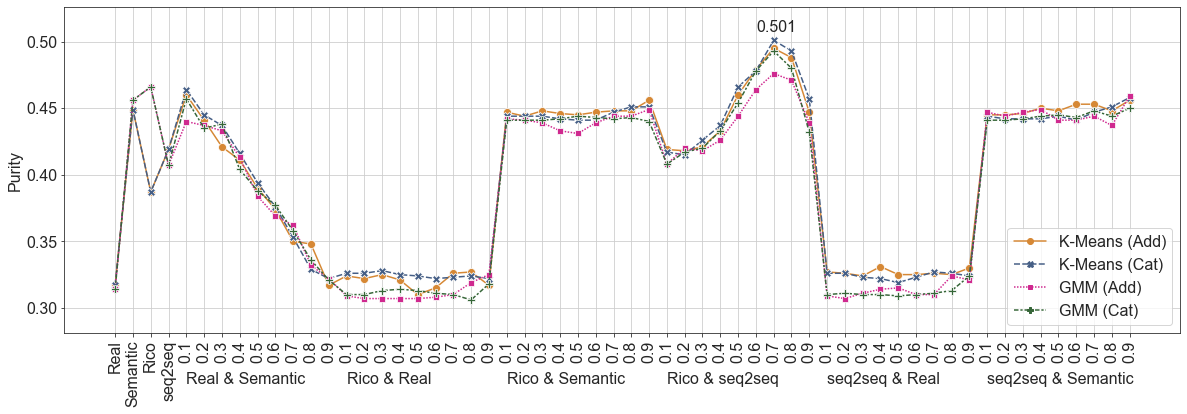

In [17]:
plt.figure(figsize=(20,6))
#plt.plot(km_add, '-go', label="K-Means (Add)")
#plt.plot(km_cat, '--r', label="K-Means (Cat)")
#plt.plot(gmm_add, '-ys', label="GMM (Add)")
#plt.plot(gmm_cat, '--b>', label="GMM (Cat)")
df_purity_34.reset_index()
sns.set_style("ticks", {'axes.grid' : True})
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34, palette=colors, markers=True, markersize=8)
plt.legend(loc="best")
plt.ylabel('Purity')
plt.xticks(ticks=range(len(labels_x)), labels=labels_x, rotation=90)
plt.ylim([df_purity_34.min().min()-0.025, df_purity_34.max().max()+0.025])
plt.text(4, 0.243, 'Real & Semantic')
plt.text(13, 0.243, 'Rico & Real')
plt.text(22, 0.243, 'Rico & Semantic')
plt.text(31, 0.243, 'Rico & seq2seq')
plt.text(40, 0.243, 'seq2seq & Real')
plt.text(49, 0.243, 'seq2seq & Semantic')
for i, j in enumerate(zip(df_purity_34.idxmax(), df_purity_34.max())):
    if i == 1: 
        plt.text(j[0]-1, j[1]+0.006, str(j[1]))
plt.savefig('../result/plot_purity_34.png', format='png', bbox_inches='tight', transparent=True)

In [ ]:
df_ari_23[0:4]['GMM (Add)']

In [18]:
row_names = ['ARI (GMM)', 'ARI (KM)', 'NMI (GMM)', 'NMI (KM)', 'Purity (GMM)', 'Purity (KM)']
column_names = ['Real', 'Semantic', 'Rico', 'seq2seq']
df_23 = pd.DataFrame([df_ari_23[0:4]['GMM (Add)'], df_ari_23[0:4]['K-Means (Add)'], df_nmi_23[0:4]['GMM (Add)'], df_nmi_23[0:4]['K-Means (Add)'], df_purity_23[0:4]['GMM (Add)'], df_purity_23[0:4]['K-Means (Add)']])
df_23.columns = column_names
df_23 = df_23.T
df_23.columns = row_names
df_23['type'] = column_names
df_23 = pd.melt(df_23, id_vars="type", var_name="eval", value_name="eval_values")

C:\Users\admin\AppData\Local\Temp\ipykernel_23664\3430781008.py:11: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  bar.set_hatch(hatch)


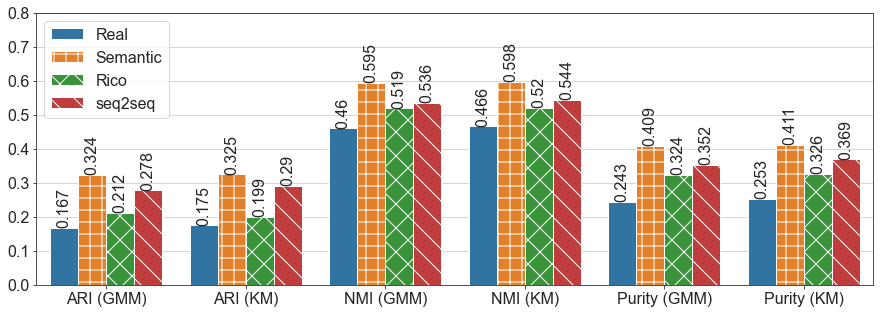

In [70]:
plt.figure(figsize=(15,5))
#plt.xticks(rotation=90)
#ax = sns.barplot(data=df_23_t, color='#3F466E')
ax = sns.barplot(x='eval', y='eval_values', data=df_23, hue='type')
#ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container, rotation=90)
hatches = [' ', '+', 'x', '\\', '*', 'o']
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
plt.legend(loc="upper left")
plt.ylim((0, 0.8))
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('../result/plot_single_23.png', format='png', bbox_inches='tight', transparent=True)

In [29]:
row_names = ['ARI (GMM)', 'ARI (KM)', 'NMI (GMM)', 'NMI (KM)', 'Purity (GMM)', 'Purity (KM)']
column_names = ['Real', 'Semantic', 'Rico', 'seq2seq']
df_34 = pd.DataFrame([df_ari_34[0:4]['GMM (Add)'], df_ari_34[0:4]['K-Means (Add)'], df_nmi_34[0:4]['GMM (Add)'], df_nmi_34[0:4]['K-Means (Add)'], df_purity_34[0:4]['GMM (Add)'], df_purity_34[0:4]['K-Means (Add)']])
df_34.columns = column_names
df_34 = df_34.T
df_34.columns = row_names
df_34['type'] = column_names
df_34 = pd.melt(df_34, id_vars="type", var_name="eval", value_name="eval_values")

C:\Users\admin\AppData\Local\Temp\ipykernel_23664\1479589633.py:11: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  bar.set_hatch(hatch)


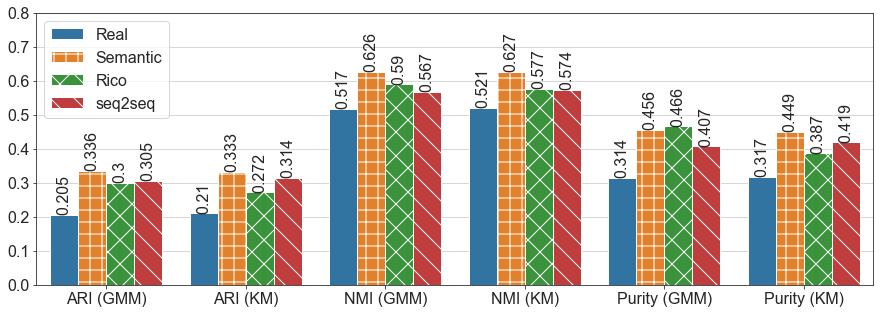

In [30]:
plt.figure(figsize=(15,5))
#plt.xticks(rotation=90)
#ax = sns.barplot(data=df_23_t, color='#3F466E')
ax = sns.barplot(x='eval', y='eval_values', data=df_34, hue='type')

#ax.bar_label(ax.containers[0])
for container in ax.containers:
    ax.bar_label(container, rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
plt.legend(loc="upper left")
plt.ylim((0, 0.8))
plt.xlabel(None)
plt.ylabel(None)
plt.savefig('../result/plot_single_34.png', format='png', bbox_inches='tight', transparent=True)

In [31]:
df_ari_23_x = df_ari_23.copy()
df_ari_23_x['label'] = labels_x
df_ari_23_x.set_index('label', inplace=True)
df_ari_23_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.175,0.175,0.167,0.167
Semantic,0.325,0.325,0.324,0.324
Rico,0.199,0.199,0.212,0.212
seq2seq,0.290,0.290,0.278,0.278
0.1,0.336,0.337,0.336,0.331


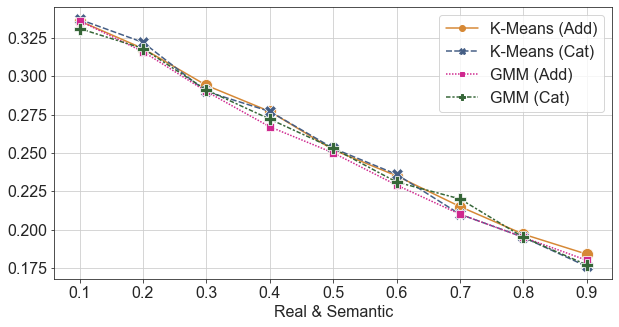

In [32]:
# real & semantic
df_ari_23_x[4:13]
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[4:13], palette=colors, markers=True, markersize=12)
plt.xlabel('Real & Semantic')
plt.savefig('../result/plot_ari_re_se_23.png', format='png', bbox_inches='tight', transparent=True)

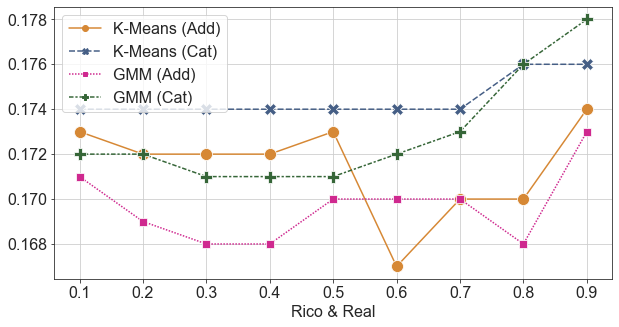

In [33]:
# rico & real
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[13:22], palette=colors, markers=True, markersize=12)
plt.xlabel('Rico & Real')
plt.savefig('../result/plot_ari_rico_re_23.png', format='png', bbox_inches='tight', transparent=True)

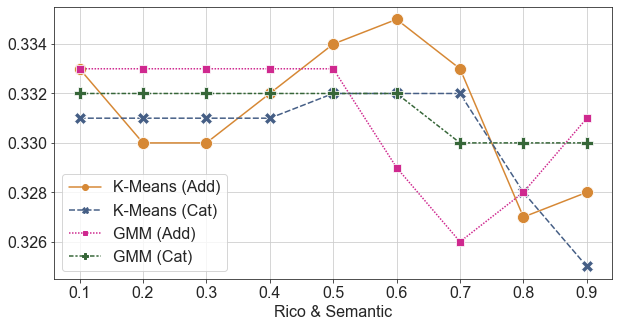

In [34]:
# rico & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[22:31], palette=colors, markers=True, markersize=12)
plt.xlabel('Rico & Semantic')
plt.savefig('../result/plot_ari_rico_se_23.png', format='png', bbox_inches='tight', transparent=True)

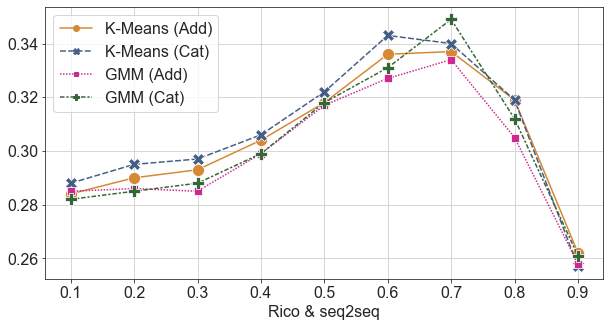

In [35]:
# rico & seq2seq
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[31:40], palette=colors, markers=True, markersize=12)
plt.xlabel('Rico & seq2seq')
plt.savefig('../result/plot_ari_rico_s2s_23.png', format='png', bbox_inches='tight', transparent=True)

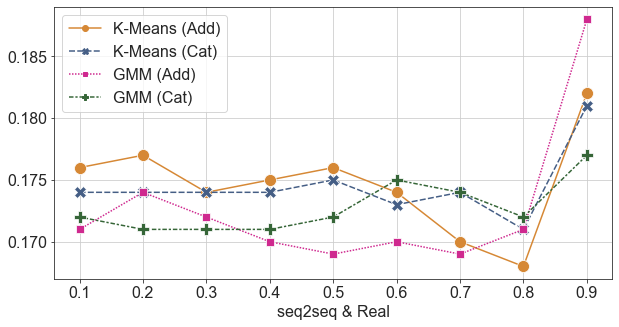

In [36]:
# seq2seq & real
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[40:49], palette=colors, markers=True, markersize=12)
plt.xlabel('seq2seq & Real')
plt.savefig('../result/plot_ari_s2s_re_23.png', format='png', bbox_inches='tight', transparent=True)

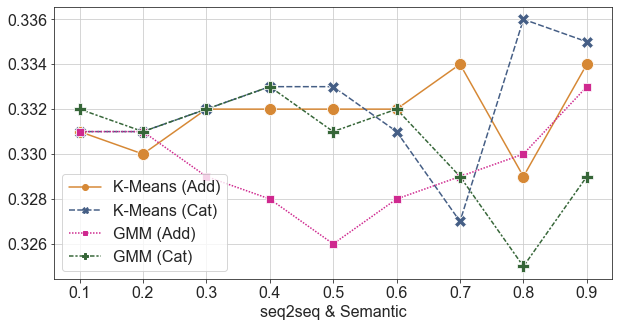

In [37]:
# seq2seq & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_23_x[49:58], palette=colors, markers=True, markersize=12)
plt.xlabel('seq2seq & Semantic')
plt.savefig('../result/plot_ari_s2s_se_23.png', format='png', bbox_inches='tight', transparent=True)

In [38]:
df_nmi_23_x = df_nmi_23.copy()
df_nmi_23_x['label'] = labels_x
df_nmi_23_x.set_index('label', inplace=True)
df_nmi_23_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.466,0.466,0.460,0.460
Semantic,0.598,0.598,0.595,0.595
Rico,0.520,0.520,0.519,0.519
seq2seq,0.544,0.544,0.536,0.536
0.1,0.600,0.604,0.598,0.599


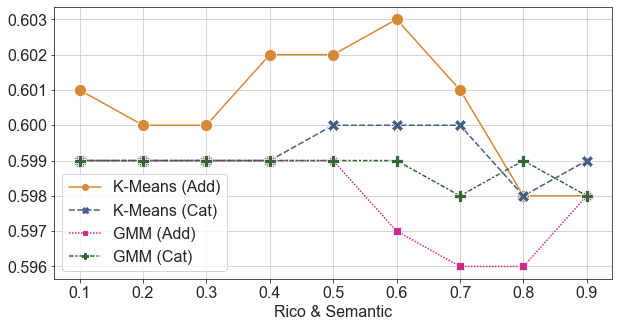

In [39]:
# rico & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_x[22:31], palette=colors, markers=True, markersize=12)
plt.xlabel('Rico & Semantic')
plt.savefig('../result/plot_nmi_rico_se_23.png', format='png', bbox_inches='tight', transparent=True)

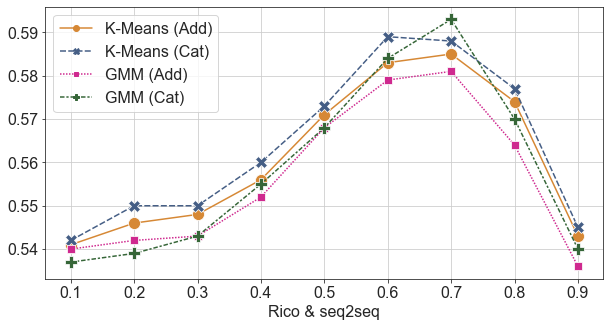

In [40]:
# rico & seq2seq
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_x[31:40], palette=colors, markers=True, markersize=12)
plt.xlabel('Rico & seq2seq')
plt.savefig('../result/plot_nmi_rico_s2s_23.png', format='png', bbox_inches='tight', transparent=True)

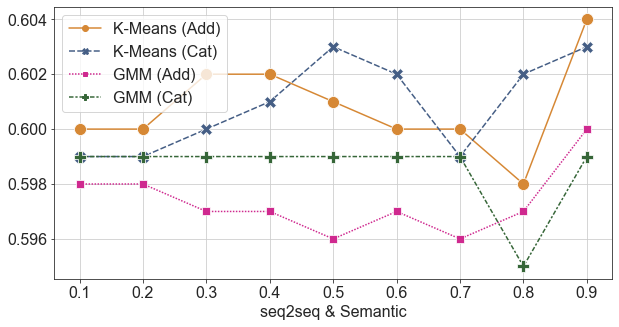

In [41]:
# seq2seq & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_23_x[49:58], palette=colors, markers=True, markersize=12)
plt.xlabel('seq2seq & Semantic')
plt.savefig('../result/plot_nmi_s2s_se_23.png', format='png', bbox_inches='tight', transparent=True)

In [42]:
df_purity_23_x = df_purity_23.copy()
df_purity_23_x['label'] = labels_x
df_purity_23_x.set_index('label', inplace=True)
df_purity_23_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.253,0.253,0.243,0.243
Semantic,0.411,0.411,0.409,0.409
Rico,0.326,0.326,0.324,0.324
seq2seq,0.369,0.369,0.352,0.352
0.1,0.428,0.428,0.426,0.411


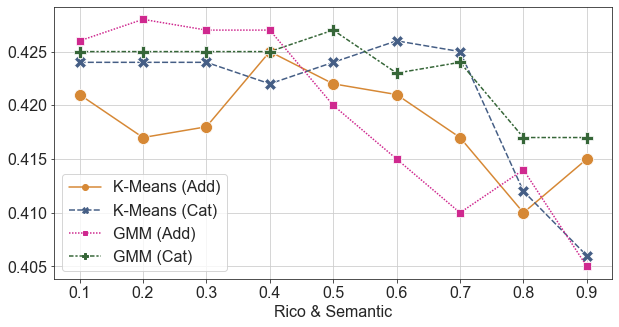

In [43]:
# rico & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23_x[22:31], palette=colors, markers=True, markersize=12)
plt.xlabel('Rico & Semantic')
plt.savefig('../result/plot_purity_rico_se_23.png', format='png', bbox_inches='tight', transparent=True)

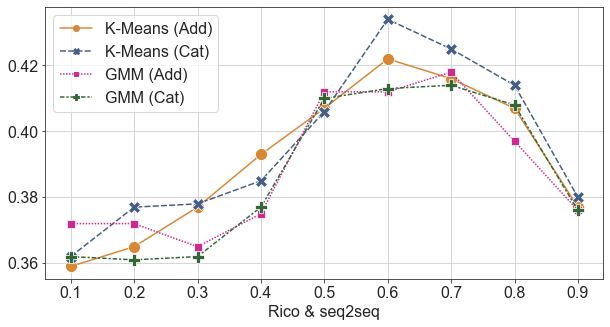

In [44]:
# rico & seq2seq
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23_x[31:40], palette=colors, markers=True, markersize=12)
plt.xlabel('Rico & seq2seq')
plt.savefig('../result/plot_purity_rico_s2s_23.png', format='png', bbox_inches='tight', transparent=True)

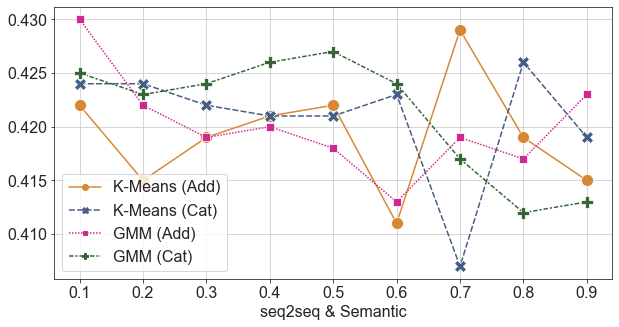

In [45]:
# seq2seq & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_23_x[49:58], palette=colors, markers=True, markersize=12)
plt.xlabel('seq2seq & Semantic')
plt.savefig('../result/plot_purity_s2s_se_23.png', format='png', bbox_inches='tight', transparent=True)

In [46]:
df_ari_34_x = df_ari_34.copy()
df_ari_34_x['label'] = labels_x
df_ari_34_x.set_index('label', inplace=True)
df_ari_34_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.210,0.210,0.205,0.205
Semantic,0.333,0.333,0.336,0.336
Rico,0.272,0.272,0.300,0.300
seq2seq,0.314,0.314,0.305,0.305
0.1,0.341,0.343,0.330,0.341


In [47]:
df_nmi_34_x = df_nmi_34.copy()
df_nmi_34_x['label'] = labels_x
df_nmi_34_x.set_index('label', inplace=True)
df_nmi_34_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.521,0.521,0.517,0.517
Semantic,0.627,0.627,0.626,0.626
Rico,0.577,0.577,0.590,0.590
seq2seq,0.574,0.574,0.567,0.567
0.1,0.629,0.631,0.619,0.625


In [48]:
df_purity_34_x = df_purity_34.copy()
df_purity_34_x['label'] = labels_x
df_purity_34_x.set_index('label', inplace=True)
df_purity_34_x.head(5)

,K-Means (Add),K-Means (Cat),GMM (Add),GMM (Cat)
label,,,,
Real,0.317,0.317,0.314,0.314
Semantic,0.449,0.449,0.456,0.456
Rico,0.387,0.387,0.466,0.466
seq2seq,0.419,0.419,0.407,0.407
0.1,0.460,0.464,0.440,0.457


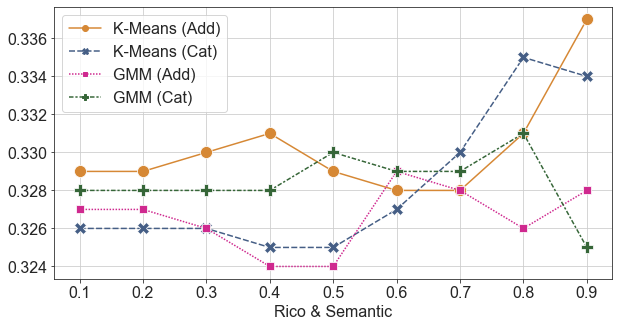

In [49]:
# rico & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34_x[22:31], palette=colors, markers=True, markersize=12)
plt.xlabel('Rico & Semantic')
plt.savefig('../result/plot_ari_rico_se_34.png', format='png', bbox_inches='tight', transparent=True)

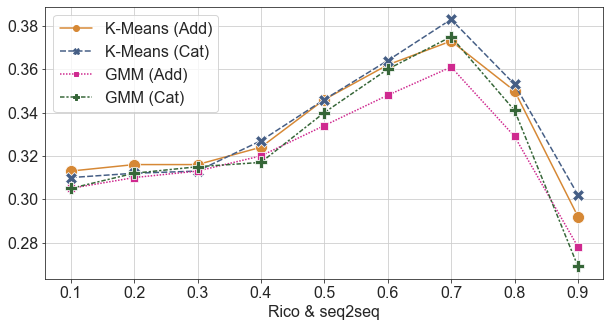

In [50]:
# rico & seq2seq
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34_x[31:40], palette=colors, markers=True, markersize=12)
plt.xlabel('Rico & seq2seq')
plt.savefig('../result/plot_ari_rico_s2s_34.png', format='png', bbox_inches='tight', transparent=True)

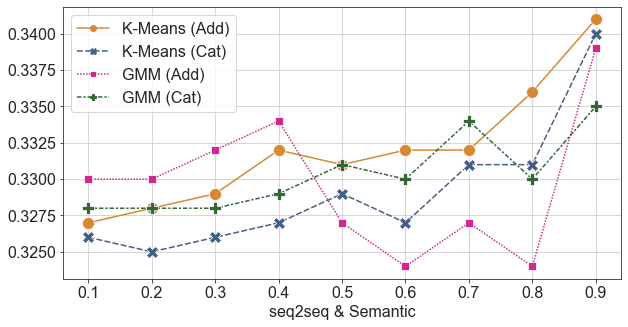

In [51]:
# seq2seq & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_ari_34_x[49:58], palette=colors, markers=True, markersize=12)
plt.xlabel('seq2seq & Semantic')
plt.savefig('../result/plot_ari_s2s_se_34.png', format='png', bbox_inches='tight', transparent=True)

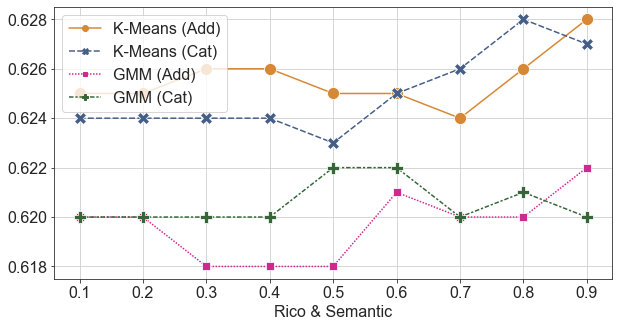

In [52]:
# rico & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34_x[22:31], palette=colors, markers=True, markersize=12)
plt.xlabel('Rico & Semantic')
plt.savefig('../result/plot_nmi_rico_se_34.png', format='png', bbox_inches='tight', transparent=True)

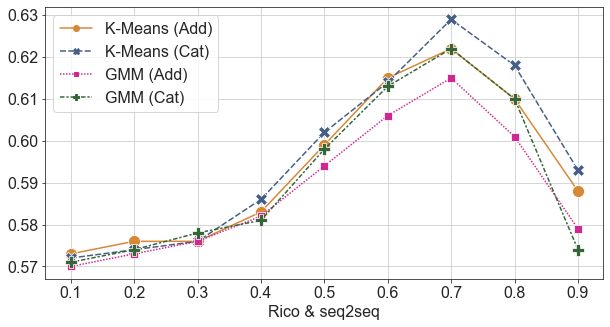

In [53]:
# rico & seq2seq
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34_x[31:40], palette=colors, markers=True, markersize=12)
plt.xlabel('Rico & seq2seq')
plt.savefig('../result/plot_nmi_rico_s2s_34.png', format='png', bbox_inches='tight', transparent=True)

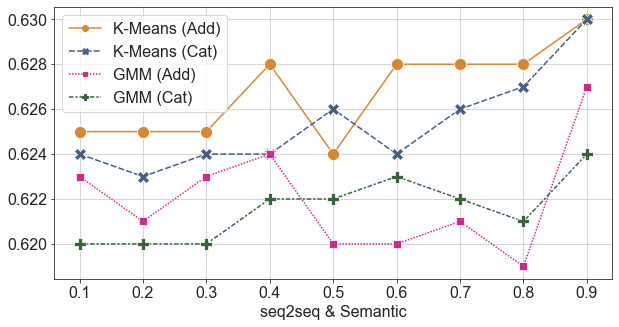

In [54]:
# seq2seq & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_nmi_34_x[49:58], palette=colors, markers=True, markersize=12)
plt.xlabel('seq2seq & Semantic')
plt.savefig('../result/plot_nmi_s2s_se_34.png', format='png', bbox_inches='tight', transparent=True)

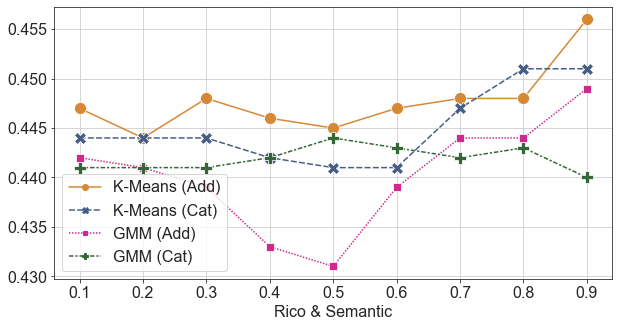

In [55]:
# rico & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34_x[22:31], palette=colors, markers=True, markersize=12)
plt.xlabel('Rico & Semantic')
plt.savefig('../result/plot_purity_rico_se_34.png', format='png', bbox_inches='tight', transparent=True)

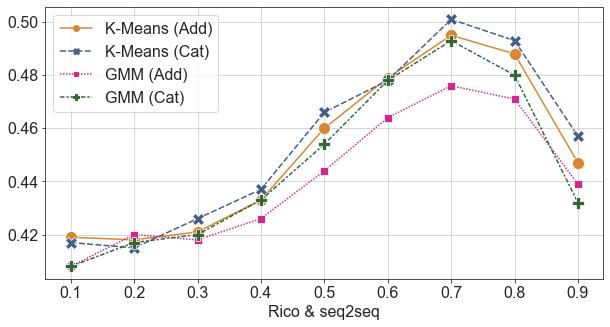

In [56]:
# rico & seq2seq
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34_x[31:40], palette=colors, markers=True, markersize=12)
plt.xlabel('Rico & seq2seq')
plt.savefig('../result/plot_purity_rico_s2s_34.png', format='png', bbox_inches='tight', transparent=True)

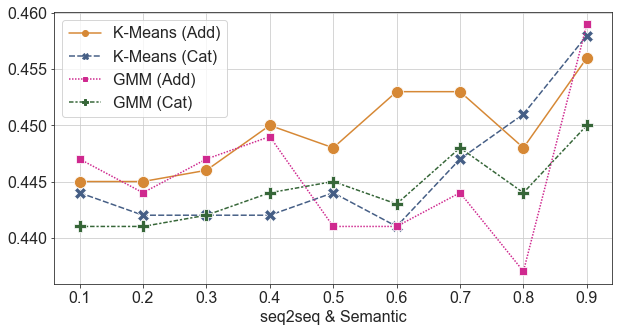

In [57]:
# seq2seq & semantic
plt.figure(figsize=(10,5))
colors = ['#D68835', '#455E85', '#CF298F', '#366638']
sns.lineplot(data=df_purity_34_x[49:58], palette=colors, markers=True, markersize=12)
plt.xlabel('seq2seq & Semantic')
plt.savefig('../result/plot_purity_s2s_se_34.png', format='png', bbox_inches='tight', transparent=True)

In [58]:
df_ari_23_a = df_ari_23.copy()
df_ari_23_a['label'] = labels_a
df_ari_23_a.set_index('label', inplace=True)
#df_ari_23_a.head(5)
print(df_ari_23_a['K-Means (Add)'].nlargest(n=5), df_ari_23_a['K-Means (Cat)'].nlargest(n=5))
print(df_ari_23_a['GMM (Add)'].nlargest(n=5), df_ari_23_a['GMM (Cat)'].nlargest(n=5))

label
Rico & seq2seq 0.7     0.337
Real & Semantic 0.1    0.336
Rico & seq2seq 0.6     0.336
Rico & Semantic 0.6    0.335
Rico & Semantic 0.5    0.334
Name: K-Means (Add), dtype: float64 label
Rico & seq2seq 0.6        0.343
Rico & seq2seq 0.7        0.340
Real & Semantic 0.1       0.337
seq2seq & Semantic 0.8    0.336
seq2seq & Semantic 0.9    0.335
Name: K-Means (Cat), dtype: float64
label
Real & Semantic 0.1    0.336
Rico & seq2seq 0.7     0.334
Rico & Semantic 0.1    0.333
Rico & Semantic 0.2    0.333
Rico & Semantic 0.3    0.333
Name: GMM (Add), dtype: float64 label
Rico & seq2seq 0.7        0.349
seq2seq & Semantic 0.4    0.333
Rico & Semantic 0.1       0.332
Rico & Semantic 0.2       0.332
Rico & Semantic 0.3       0.332
Name: GMM (Cat), dtype: float64


In [59]:
df_ari_34_a = df_ari_34.copy()
df_ari_34_a['label'] = labels_a
df_ari_34_a.set_index('label', inplace=True)
print(df_ari_34_a['K-Means (Add)'].nlargest(n=5), df_ari_34_a['K-Means (Cat)'].nlargest(n=5))
print(df_ari_34_a['GMM (Add)'].nlargest(n=5), df_ari_34_a['GMM (Cat)'].nlargest(n=5))

label
Rico & seq2seq 0.7     0.373
Rico & seq2seq 0.6     0.362
Rico & seq2seq 0.8     0.350
Rico & seq2seq 0.5     0.346
Real & Semantic 0.1    0.341
Name: K-Means (Add), dtype: float64 label
Rico & seq2seq 0.7     0.383
Rico & seq2seq 0.6     0.364
Rico & seq2seq 0.8     0.353
Rico & seq2seq 0.5     0.346
Real & Semantic 0.1    0.343
Name: K-Means (Cat), dtype: float64
label
Rico & seq2seq 0.7        0.361
Rico & seq2seq 0.6        0.348
seq2seq & Semantic 0.9    0.339
Semantic                  0.336
Rico & seq2seq 0.5        0.334
Name: GMM (Add), dtype: float64 label
Rico & seq2seq 0.7     0.375
Rico & seq2seq 0.6     0.360
Real & Semantic 0.1    0.341
Rico & seq2seq 0.8     0.341
Rico & seq2seq 0.5     0.340
Name: GMM (Cat), dtype: float64


In [60]:
df_nmi_23_a = df_nmi_23.copy()
df_nmi_23_a['label'] = labels_a
df_nmi_23_a.set_index('label', inplace=True)
print(df_nmi_23_a['K-Means (Add)'].nlargest(n=5), df_nmi_23_a['K-Means (Cat)'].nlargest(n=5))
print(df_nmi_23_a['GMM (Add)'].nlargest(n=5), df_nmi_23_a['GMM (Cat)'].nlargest(n=5))
print('--')
df_nmi_34_a = df_nmi_34.copy()
df_nmi_34_a['label'] = labels_a
df_nmi_34_a.set_index('label', inplace=True)
print(df_nmi_34_a['K-Means (Add)'].nlargest(n=5), df_nmi_34_a['K-Means (Cat)'].nlargest(n=5))
print(df_nmi_34_a['GMM (Add)'].nlargest(n=5), df_nmi_34_a['GMM (Cat)'].nlargest(n=5))

label
seq2seq & Semantic 0.9    0.604
Rico & Semantic 0.6       0.603
Rico & Semantic 0.4       0.602
Rico & Semantic 0.5       0.602
seq2seq & Semantic 0.3    0.602
Name: K-Means (Add), dtype: float64 label
Real & Semantic 0.1       0.604
seq2seq & Semantic 0.5    0.603
seq2seq & Semantic 0.9    0.603
seq2seq & Semantic 0.6    0.602
seq2seq & Semantic 0.8    0.602
Name: K-Means (Cat), dtype: float64
label
seq2seq & Semantic 0.9    0.600
Rico & Semantic 0.1       0.599
Rico & Semantic 0.2       0.599
Rico & Semantic 0.3       0.599
Rico & Semantic 0.4       0.599
Name: GMM (Add), dtype: float64 label
Real & Semantic 0.1    0.599
Rico & Semantic 0.1    0.599
Rico & Semantic 0.2    0.599
Rico & Semantic 0.3    0.599
Rico & Semantic 0.4    0.599
Name: GMM (Cat), dtype: float64
--
label
seq2seq & Semantic 0.9    0.630
Real & Semantic 0.1       0.629
Rico & Semantic 0.9       0.628
seq2seq & Semantic 0.4    0.628
seq2seq & Semantic 0.6    0.628
Name: K-Means (Add), dtype: float64 label
Real

In [61]:
df_purity_23_a = df_purity_23.copy()
df_purity_23_a['label'] = labels_a
df_purity_23_a.set_index('label', inplace=True)
print(df_purity_23_a['K-Means (Add)'].nlargest(n=5), df_purity_23_a['K-Means (Cat)'].nlargest(n=5))
print(df_purity_23_a['GMM (Add)'].nlargest(n=5), df_purity_23_a['GMM (Cat)'].nlargest(n=5))
print('--')
df_purity_34_a = df_purity_34.copy()
df_purity_34_a['label'] = labels_a
df_purity_34_a.set_index('label', inplace=True)
print(df_purity_34_a['K-Means (Add)'].nlargest(n=5), df_purity_34_a['K-Means (Cat)'].nlargest(n=5))
print(df_purity_34_a['GMM (Add)'].nlargest(n=5), df_purity_34_a['GMM (Cat)'].nlargest(n=5))

label
seq2seq & Semantic 0.7    0.429
Real & Semantic 0.1       0.428
Rico & Semantic 0.4       0.425
Rico & Semantic 0.5       0.422
Rico & seq2seq 0.6        0.422
Name: K-Means (Add), dtype: float64 label
Rico & seq2seq 0.6        0.434
Real & Semantic 0.1       0.428
Rico & Semantic 0.6       0.426
seq2seq & Semantic 0.8    0.426
Rico & Semantic 0.7       0.425
Name: K-Means (Cat), dtype: float64
label
seq2seq & Semantic 0.1    0.430
Rico & Semantic 0.2       0.428
Rico & Semantic 0.3       0.427
Rico & Semantic 0.4       0.427
Real & Semantic 0.1       0.426
Name: GMM (Add), dtype: float64 label
Rico & Semantic 0.5       0.427
seq2seq & Semantic 0.5    0.427
seq2seq & Semantic 0.4    0.426
Rico & Semantic 0.1       0.425
Rico & Semantic 0.2       0.425
Name: GMM (Cat), dtype: float64
--
label
Rico & seq2seq 0.7     0.495
Rico & seq2seq 0.8     0.488
Rico & seq2seq 0.6     0.479
Real & Semantic 0.1    0.460
Rico & seq2seq 0.5     0.460
Name: K-Means (Add), dtype: float64 label
Rico

In [62]:
mean_name = ['Real & Semantic', 'Rico & Real', 'Rico & Semantic', 'Rico & seq2seq', 'seq2seq & Real', 'seq2seq & Semantic']
type_name = ['K-Means (Add)', 'K-Means (Cat)', 'GMM (Add)', 'GMM (Cat)']
df_ari_23_mean = pd.DataFrame([df_ari_23_a[4:13].mean(), df_ari_23_a[13:22].mean(),  df_ari_23_a[22:31].mean(), df_ari_23_a[31:40].mean(), df_ari_23_a[40:49].mean(), df_ari_23_a[49:58].mean()])
df_ari_23_mean = df_ari_23_mean.T
df_ari_23_mean.columns = mean_name
df_ari_23_mean['type'] = type_name
df_ari_23_mean = pd.melt(df_ari_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_nmi_23_mean = pd.DataFrame([df_nmi_23_a[4:13].mean(), df_nmi_23_a[13:22].mean(),  df_nmi_23_a[22:31].mean(), df_nmi_23_a[31:40].mean(), df_nmi_23_a[40:49].mean(), df_nmi_23_a[49:58].mean()])
df_nmi_23_mean = df_nmi_23_mean.T
df_nmi_23_mean.columns = mean_name
df_nmi_23_mean['type'] = type_name
df_nmi_23_mean = pd.melt(df_nmi_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_purity_23_mean = pd.DataFrame([df_purity_23_a[4:13].mean(), df_purity_23_a[13:22].mean(),  df_purity_23_a[22:31].mean(), df_purity_23_a[31:40].mean(), df_purity_23_a[40:49].mean(), df_purity_23_a[49:58].mean()])
df_purity_23_mean = df_purity_23_mean.T
df_purity_23_mean.columns = mean_name
df_purity_23_mean['type'] = type_name
df_purity_23_mean = pd.melt(df_purity_23_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_ari_34_mean = pd.DataFrame([df_ari_34_a[4:13].mean(), df_ari_34_a[13:22].mean(),  df_ari_34_a[22:31].mean(), df_ari_34_a[31:40].mean(), df_ari_34_a[40:49].mean(), df_ari_34_a[49:58].mean()])
df_ari_34_mean = df_ari_34_mean.T
df_ari_34_mean.columns = mean_name
df_ari_34_mean['type'] = type_name
df_ari_34_mean = pd.melt(df_ari_34_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_nmi_34_mean = pd.DataFrame([df_nmi_34_a[4:13].mean(), df_nmi_34_a[13:22].mean(),  df_nmi_34_a[22:31].mean(), df_nmi_34_a[31:40].mean(), df_nmi_34_a[40:49].mean(), df_nmi_34_a[49:58].mean()])
df_nmi_34_mean = df_nmi_34_mean.T
df_nmi_34_mean.columns = mean_name
df_nmi_34_mean['type'] = type_name
df_nmi_34_mean = pd.melt(df_nmi_34_mean, id_vars="type", var_name="eval", value_name="eval_values")

df_purity_34_mean = pd.DataFrame([df_purity_34_a[4:13].mean(), df_purity_34_a[13:22].mean(),  df_purity_34_a[22:31].mean(), df_purity_34_a[31:40].mean(), df_purity_34_a[40:49].mean(), df_purity_34_a[49:58].mean()])
df_purity_34_mean = df_purity_34_mean.T
df_purity_34_mean.columns = mean_name
df_purity_34_mean['type'] = type_name
df_purity_34_mean = pd.melt(df_purity_34_mean, id_vars="type", var_name="eval", value_name="eval_values")


C:\Users\admin\AppData\Local\Temp\ipykernel_23664\3019535472.py:8: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  bar.set_hatch(hatch)


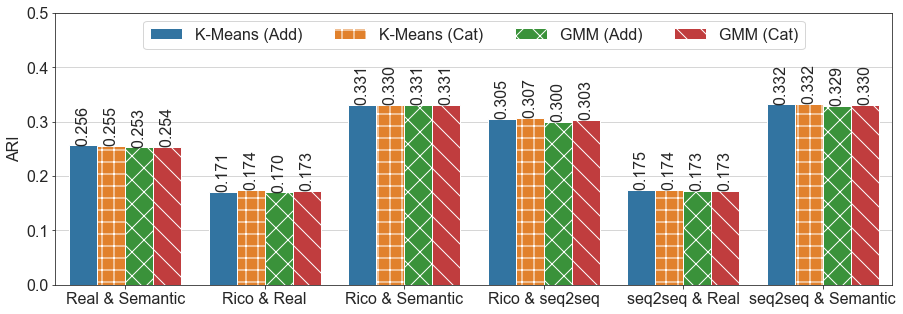

In [64]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_ari_23_mean, hue='type')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
#plt.legend(loc="upper center", bbox_to_anchor=(.5, 1), ncol=4)
plt.legend(loc="upper center", ncol=4)
plt.ylim((0, 0.5))
plt.xlabel(None)
plt.ylabel('ARI')
plt.savefig('../result/plot_ari_23_mean.png', format='png', bbox_inches='tight', transparent=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_23664\302311806.py:8: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  bar.set_hatch(hatch)


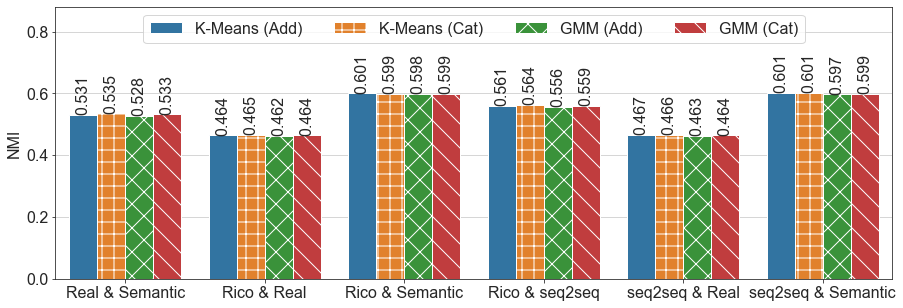

In [65]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_nmi_23_mean, hue='type')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
plt.legend(loc="upper center", ncol=4)
plt.ylim((0, 0.88))
plt.xlabel(None)
plt.ylabel('NMI')
plt.savefig('../result/plot_nmi_23_mean.png', format='png', bbox_inches='tight', transparent=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_23664\306097778.py:8: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  bar.set_hatch(hatch)


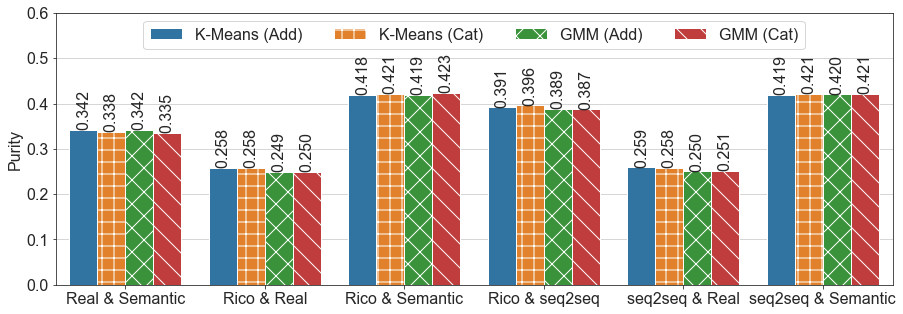

In [66]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_purity_23_mean, hue='type')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
plt.legend(loc="upper center", ncol=4)
plt.ylim((0, 0.6))
plt.xlabel(None)
plt.ylabel('Purity')
plt.savefig('../result/plot_purity_23_mean.png', format='png', bbox_inches='tight', transparent=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_23664\2076551761.py:8: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  bar.set_hatch(hatch)


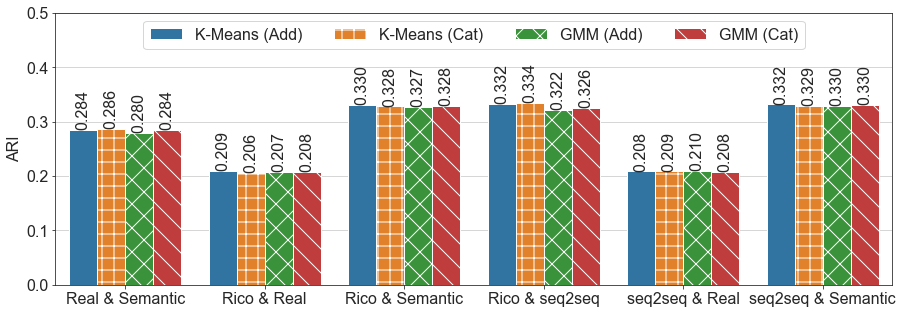

In [67]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_ari_34_mean, hue='type')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
plt.legend(loc="upper center", ncol=4)
plt.ylim((0, 0.5))
plt.xlabel(None)
plt.ylabel('ARI')
plt.savefig('../result/plot_ari_34_mean.png', format='png', bbox_inches='tight', transparent=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_23664\3777237194.py:8: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  bar.set_hatch(hatch)


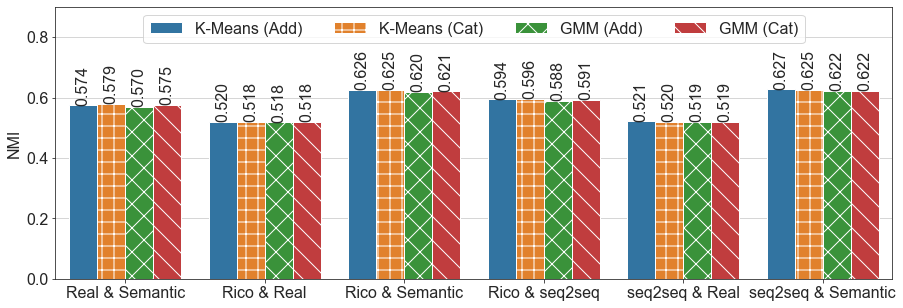

In [68]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_nmi_34_mean, hue='type')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
plt.legend(loc="upper center", ncol=4)
plt.ylim((0, 0.9))
plt.xlabel(None)
plt.ylabel('NMI')
plt.savefig('../result/plot_nmi_34_mean.png', format='png', bbox_inches='tight', transparent=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_23664\4050935988.py:8: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values " ". Passing invalid values is deprecated since 3.4 and will become an error in 3.7.
  bar.set_hatch(hatch)


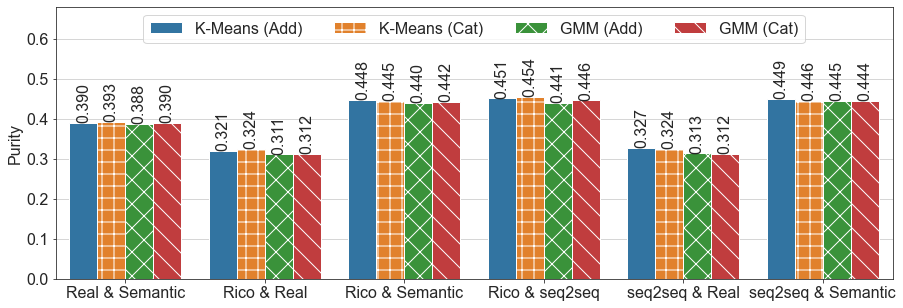

In [69]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='eval', y='eval_values', data=df_purity_34_mean, hue='type')

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', rotation=90)
for bars, hatch in zip(ax.containers, hatches):
    for bar in bars:
        bar.set_hatch(hatch)
plt.legend(loc="upper center", ncol=4)
plt.ylim((0, 0.68))
plt.xlabel(None)
plt.ylabel('Purity')
plt.savefig('../result/plot_purity_34_mean.png', format='png', bbox_inches='tight', transparent=True)